In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from datetime import datetime
import dhi_project  
import random
%matplotlib inline

%run dhi_project.ipynb 
!pip install import_ipynb

In [12]:
import cufflinks as cf
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected= True)
cf.go_offline()

In [13]:
raw_df = pd.read_csv('ft82_20140101_20170101_origin.csv')  # origin  data loaded
raw_df.rename(columns={"Unnamed: 0" : "DATE", "0" : "WFLOW"}, inplace= True)
raw_df['DATE'] = pd.to_datetime(raw_df['DATE']) # Convert data type to timestamp 
raw_df.set_index('DATE', inplace= True) # Set the index to be Datetime


In [14]:
df = raw_df.copy(deep=True) # copy raw_df into  df
len(df[df['WFLOW']==0.0])

532

## Reindexing of dataset
We can call ***reindex()*** on the dataset using the new index list ****idx_list*** 

In [15]:
# index ordering
idxmin =np.min(df.index)  # min index or start index
idxmax =np.max(df.index) # max index or end inndex
idx_list = pd.date_range(idxmin, idxmax, freq= '1min') # index with one minute frequence

# set new index for dataset
df = df.reindex(idx_list)
df['DATE'] = df.index
df.set_index('DATE', inplace = True)
#print('Number of missing records: {} '.format(df.isna().sum()))
#df.head(10)

In [16]:
reindex_df = df.copy(deep=True) # copy of dataset after reindexing

df

,WFLOW
DATE,
2014-01-01 00:01:00,642.719788
2014-01-01 00:02:00,626.239807
2014-01-01 00:03:00,647.663818
2014-01-01 00:04:00,672.383789
2014-01-01 00:05:00,672.383789
...,...
2016-12-31 23:56:00,753.135803
2016-12-31 23:57:00,NaN
2016-12-31 23:58:00,731.711792


## Consecutive NaN Groups

In [20]:
# Get an aggregate sum of the consecutive NaNs by group of non-NaN values of the columns
non_nan_cum =  df['WFLOW'].notnull().astype(int).cumsum()

nan_group = df['WFLOW'].isna().groupby(non_nan_cum).agg('sum')

# Consecutive NaN counts as dataframe
nan_group_df = pd.DataFrame(nan_group[nan_group != 0].astype(int).value_counts())

nan_group_df.reset_index(inplace = True)

nan_group_df.rename(columns={"index" : "NaNType", "WFLOW" : "NaNFrequency" }, inplace= True)

#aapend 'nan' to NaN types
nan_group_df['Consec_Nan_Types'] = ['nan x '+str(i) for i in nan_group_df['NaNType']]

# Column NaN length in minute
nan_group_df['length_in_mn'] = nan_group_df['NaNType']*nan_group_df['NaNFrequency']

# Column NaN length in hour
nan_group_df['length_in_hrs'] = np.round(nan_group_df['length_in_mn']/60, 2)
# NaN length in day
nan_group_df['length_in_day'] = np.round(nan_group_df['length_in_hrs']/24, 2)

nan_group_df

#print(nan_group_df)

#Consecutive NaN filter

#nan_group_df = nan_group_df[(nan_group_df['NaNType']>1) & (nan_group_df['length_in_day'] >= 0.5)]
#nan_group_df.sort_values(by = ['length_in_day'],ascending = False)




,NaNType,NaNFrequency,Consec_Nan_Types,length_in_mn,length_in_hrs,length_in_day
0,1,21528,nan x 1,21528,358.80,14.95
1,2,710,nan x 2,1420,23.67,0.99
2,14,315,nan x 14,4410,73.50,3.06
3,3,68,nan x 3,204,3.40,0.14
4,4,24,nan x 4,96,1.60,0.07
5,5,21,nan x 5,105,1.75,0.07
6,6,21,nan x 6,126,2.10,0.09
7,7,11,nan x 7,77,1.28,0.05
8,8,11,nan x 8,88,1.47,0.06
9,9,7,nan x 9,63,1.05,0.04


In [21]:
len(nan_group_df)

46

In [28]:
pp= nan_group_df['NaNFrequency']*nan_group_df['NaNType']
pp.sum()

54341

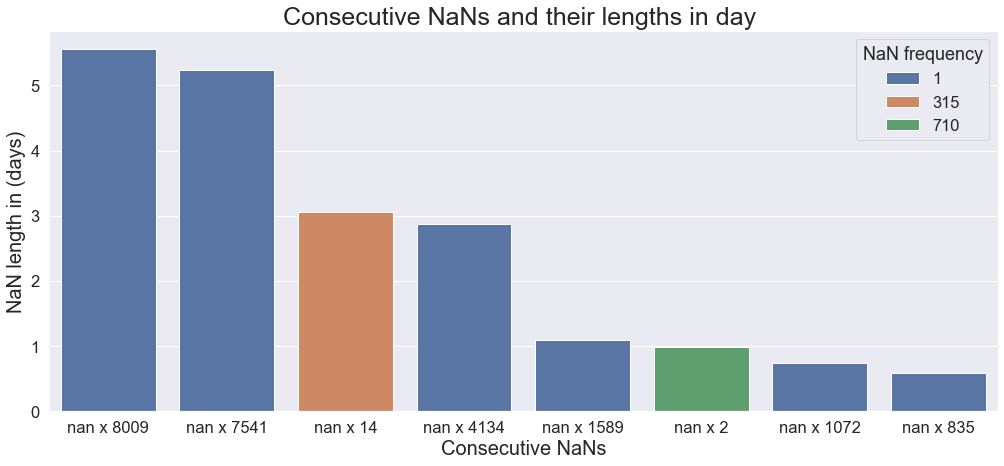

In [10]:
# Plot Consecutive NaNs
sns.set_style("darkgrid")
sns.set(font_scale= 1.5)
plt.figure(figsize=(17,7))
cons_bar= sns.barplot(x='Consec_Nan_Types', 
            y="length_in_day", 
            data=nan_group_df, 
           # color= 'red', 
           hue= 'NaNFrequency',
           dodge= False,           
        
            order=nan_group_df.sort_values('length_in_day',ascending = False).Consec_Nan_Types)
# for b in cons_bar.patches:
#     cons_bar.annotate(format(b.get_height(), '.2f'), 
#                       (b.get_x() + b.get_width() / 2., b.get_height()), 
#                       ha = 'center', va = 'center',
#                       xytext = (0, 9),
#                       textcoords = 'offset points')


# Label settings
plt.xlabel("Consecutive NaNs", size = 20)
plt.ylabel("NaN length in (days)", size=20)
plt.title("Consecutive NaNs and their lengths in day ", size=25)
plt.legend(title = 'NaN frequency')
#plt.tight_layout()

In [ ]:
data=nan_group_df
import plotly.graph_objects as go


fig = go.Figure([go.Bar(x=data['Consec_Nan_Types'], y=data["length_in_day"])])
fig.show()


In [ ]:
fig = px.bar(nan_group_df.sort_values('length_in_day',ascending = False),\
              x='Consec_Nan_Types',  y="length_in_day",
            title= 'Consecutive NaNs vs Frequency',           
            labels={
                     "Consec_Nan_Types": "Consecutive NaN Types",
                     "length_in_day": "NaN Frequency in Day"})
fig.update_traces(texttemplate='%{length_in_day:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')


fig.update_layout(showlegend = True)
fig.update(layout=dict(title=dict(x=0.5)))
fig.show()

## Get Consecuive NaN indices

In [ ]:
consecu_nan = 8009
df['non-nan_group']= non_nan_cum
dfp= df[df.WFLOW.isnull()]
dfp=dfp[dfp['non-nan_group'].isin(dfp['non-nan_group'].value_counts()\
                               [dfp['non-nan_group'].value_counts()== consecu_nan].index)]
print(dfp.index)


In [ ]:
 reindex_df['WFLOW']['2015-02-19': '2015-02-27'].iplot();

In [ ]:
 reindex_df['WFLOW']['2014-06-14': '2014-06-21'].iplot();

## Consecutive NaN filtering 

In [ ]:
# Consider dataset consisting only the consecutive NaNs less than 7541.

non_nan_cum =  df['WFLOW'].notnull().astype(int).cumsum()
consecu_nan = 1440
df['non-nan_group']= non_nan_cum
df_nan_filter =~(df['non-nan_group'].isin(df['non-nan_group'].value_counts()\
                               [df['non-nan_group'].value_counts() > consecu_nan].index))
#print(dfp.index)
df_nan_filter = df[df_nan_filter]
df_nan_filter.drop(['non-nan_group'], axis = 1, inplace = True)

df_nan_filter
#df = df_nan_filter
#df = df_nan_filter
#df
                 

In [ ]:
df.drop(['non-nan_group'], axis = 1, inplace = True)
df

In [ ]:
#len(df[df['WFLOW']==0.0])

In [ ]:
# #%matplotlib notebook
# series = df.WFLOW.fillna(method= 'ffill')
# #ws =[30, 1.80]
# pp= outlier_detection2(series,5,1.45)
# #series[pp]
# print(len(series[pp]))
# #plot_anomaly_data2(series, series[pp])

In [ ]:
df['WFLOW'].isnull().head(10)

Create a column contains NaN values using forward fill method

In [ ]:
nan_lenght = len(df[df.WFLOW.isna()])
nan_lenght


In [ ]:
b_col =  np.where(df['WFLOW'].isnull(), 0, 1)
df['FilledNaN'] = b_col 
df.head(10)

In [ ]:
df.columns

In [ ]:
 df[df['WFLOW'] == 0.0 ]

In [ ]:
# df_median = np.mean(df[df['WFLOW'] > 0])
# df[df['WFLOW']==0.0] = df_median
# df_median

In [ ]:
df = df[df['WFLOW'] != 0.0]

In [ ]:
df

In [ ]:

series = df.WFLOW.fillna(method= 'ffill')
#ws =[30, 1.80]
pp= outlier_detection2(series,5,1.30)
series[pp]
print(len(series[pp]))
#plot_anomaly_data22(series, series[pp])

In [ ]:
df

## Rolling Window implementation 

In [ ]:
window = 25
#df.drop(['FilledNaN'], inplace = True)
df['WFLOW'].fillna(method= 'ffill', inplace = True)
df['r_std']= df['WFLOW'].rolling(window).std()
df['r_mean'] = df['WFLOW'].rolling(window).mean()
#df.drop(df.index[0:(window-1)], inplace= True)
df.fillna(method= 'bfill', inplace = True)
df

In [ ]:
df

In [ ]:
df

In [ ]:
window_list = range(5,35,5)
weight_list = [1.30, 1.45]
for w in window_list:
    
    df['WFLOW'].fillna(method= 'ffill', inplace = True)
    df['r_std']= df['WFLOW'].rolling(w).std()
    df['r_mean'] = df['WFLOW'].rolling(w).mean()
    df.fillna(method= 'bfill', inplace = True)
    for i in weight_list:
        outlier_min = df['r_mean']- df['r_std']*i
        outlier_max = df['r_mean']+ df['r_std']*i
        outlier_df = df[(df['WFLOW'] < outlier_min.values) | (df['WFLOW'] > outlier_max.values)]
    print('length: {} \n WFLOW was NaN: {}' .format(len(outlier_df), len(outlier_df[outlier_df['FilledNaN'] == 0])))
        
#df = df[['WFLOW', 'r_std', 'r_mean']]
    

In [ ]:
window_list = [5, 10, 15, 20, 25, 30]
weight_list = [1.30, 1.45, 1.60, 1.75, 1.90, 2.00]
outlier_list = [] # the list containing the computed outliers for each combinaition
for w in range(0, len(window_list)):
    print("------------ w = {} ------------\n". format(window_list[w]))
    for i in range(0, len(weight_list)):
        # mean and standard deviation  rolling windows
        df['WFLOW'].fillna(method= 'ffill', inplace = True)
        df['r_std']= df['WFLOW'].rolling(window_list[w]).std()
        df['r_mean'] = df['WFLOW'].rolling(window_list[w]).mean()
        df.fillna(method= 'bfill', inplace = True)
        # Compute dan create outlier data lists   # 
        outlier_min = df['r_mean']- df['r_std']* weight_list[i]
        outlier_max = df['r_mean']+ df['r_std']*weight_list[i]
        outlier_df = df[(df['WFLOW'] < outlier_min.values) | (df['WFLOW'] > outlier_max.values)]
        outlier_list.append(outlier_df) # update the list 
        print('length: {} \n WFLOW was NaN: {}' .format(len(outlier_df), len(outlier_df[outlier_df['FilledNaN'] == 0])))

In [ ]:
len(outlier_list) # the list contains 36 combinaitions of parameters (df, w, stdw)
outlier_list[0] # ----> (5, 1.30)


In [ ]:

random.seed(101)  # s
#window = 5
dweigth =1.77 ## make array of weigth here !!!!

    
outlier_min = df['r_mean']- df['r_std']*dweigth
#print(outlier_min.values)
#print(outlier_min)

outlier_max = df['r_mean']+ df['r_std']*dweigth
#print(outlier_max.values)
#print(outlier_max)


    


outlier_df = df[(df['WFLOW'] < outlier_min.values) | (df['WFLOW'] > outlier_max.values)]
#outlier_df = outlier_df.drop(['r_mean', 'r_std'], inplace = True)
#print(outlier_df[outlier_df['FilledNaN'] == 0].head(20))
#print(outlier_df.index)
#print(outlier_df.min())


# visualization


# fig, ax = plt.subplots(figsize=(17,7))
# ax.plot(df.index, df['WFLOW'], color='blue', label = 'WFLOW Values')
# ax.scatter(outlier_df.index ,outlier_df['WFLOW'], color='red', label='Outliers',  marker = 'o', s = 100)
# plt.legend()
# plt.show()

In [ ]:
df

In [ ]:
random.seed(101)
dweigth = 2.00 ## make array of weigth here 
    
outlier_min = df['r_mean']- df['r_std']*dweigth

outlier_max = df['r_mean']+ df['r_std']*dweigth
outlier_df = df[(df['WFLOW'] < outlier_min.values) | (df['WFLOW'] > outlier_max.values)]
#print(outlier_df.index)

outlier_df

In [ ]:
outlier_min.values

In [ ]:
random.seed(101)
dweigth_list = [1.30, 1.45, 1.60, 1.75, 1.90, 2.00] ## make array of weigth here 
for i in dweigth_list:
    outlier_min = df['r_mean']- df['r_std']*i
    outlier_max = df['r_mean']+ df['r_std']*i
    outlier_df = df[(df['WFLOW'] < outlier_min.values) | (df['WFLOW'] > outlier_max.values)]
    print('length: {} \n WFLOW was NaN: {}' .format(len(outlier_df), len(outlier_df[outlier_df['FilledNaN'] == 0])))

In [ ]:
outlier_df[outlier_df['WFLOW'] == 0.0]

In [ ]:
outlier_df[outlier_df['FilledNaN'] == 0]

In [ ]:
# fig, ax = plt.subplots(figsize=(17,7))
# ax.plot(df.index, df['WFLOW'], color='blue', label = 'WFLOW Values')
# ax.scatter(outlier_df.index ,outlier_df['WFLOW'], color='red', label='Outliers',  marker = 'o', s = 100)
# plt.legend()
# plt.show()

In [ ]:
# outlier_data = go.Scattergl(x = outlier_df.index, y = outlier_df['WFLOW'], mode = 'markers', name = 'Outlier Points')
# df_data = go.Scattergl(x = df.index, y = df['WFLOW'], mode = 'lines', name = 'Actual Data')
# layout = go.Layout(title = 'Outlier data points', xaxis = dict(title = 'DATE'),
#                                                                yaxis = dict(title = 'WFLOW'))
# fig = go.Figure(data = [outlier_data, df_data], layout = layout)
# py.iplot(fig)

In [ ]:
outlier_min

In [ ]:
outlier_df['WFLOW']

In [ ]:
series = df['WFLOW']
outlier_df = outlier_df['WFLOW']
plot_anomaly_data2(series, outlier_df)

In [ ]:
fig = go.Figure()

# Add traces
fig.add_trace(go.Scattergl(x = outlier_df.index, y = outlier_df['WFLOW'].values,
                    mode='markers',
                    name='Outliers Points'))
fig.add_trace(go.Scattergl(x = df.index, y = df['WFLOW'].values, mode = 'lines',
                    name='Actual Data'))

fig.show()

In [ ]:
series = df['WFLOW']
outlier_df = outlier_df['WFLOW']
low_bound = outlier_min
upper_bound = outlier_max
plot_anomaly_data_bounded(series, outlier_df, low_bound, upper_bound)


In [ ]:
fig = go.Figure()

# Add traces
fig.add_trace(go.Scattergl(x = outlier_df.index, y = outlier_df['WFLOW'],
                    mode='markers',
                    name='Outliers Points'))
fig.add_trace(go.Scattergl(x = df.index, y = df['WFLOW'], mode = 'lines',
                    name='Actual Data'))
fig.add_trace(go.Scattergl(x = outlier_min.index, y = outlier_min.values, mode = 'lines',
                    name='Low Bound'))
fig.add_trace(go.Scattergl(x = outlier_max.index, y = outlier_max.values, mode = 'lines',
                    name='Upper Bound'))


fig.show()